In [31]:
from datetime import date
from nsepy import get_history
import numpy as np
import pandas as pd
import pickle
import yfinance as yf

In [32]:
df = pd.read_csv('ind_nifty50list.csv')
nifty_companies_symbols=df['Symbol'].values.tolist()
nifty_companies_symbols=df['Symbol'].values.tolist()
for count in range(len(nifty_companies_symbols)):
    nifty_companies_symbols[count] = nifty_companies_symbols[count] + ".NS"

In [33]:
start = date(2021, 1, 1)
end = date(2022, 12, 31)
all_data=pd.DataFrame(columns=['Symbol','Close','P/L %'])
for symbol in nifty_companies_symbols:
    data=yf.download(symbol,start=start,end=end,actions=True)
    data=data[['Close']]
    data['P/L %']=data['Close'].pct_change(periods=132)*100
    data['Symbol']=symbol[:-3]
    all_data=pd.concat([all_data,data])
all_data

[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


[*********************100%***********************]  1 of 1 completed


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P/L %']=data['Close'].pct_change(periods=132)*100
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3706416814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol']=symbol[:-3]


,Symbol,Close,P/L %
2021-01-01 00:00:00+05:30,ADANIENT,491.149994,NaN
2021-01-04 00:00:00+05:30,ADANIENT,494.500000,NaN
2021-01-05 00:00:00+05:30,ADANIENT,494.399994,NaN
2021-01-06 00:00:00+05:30,ADANIENT,490.899994,NaN
2021-01-07 00:00:00+05:30,ADANIENT,518.099976,NaN
...,...,...,...
2022-12-26 00:00:00+05:30,WIPRO,380.500000,-13.542378
2022-12-27 00:00:00+05:30,WIPRO,386.600006,-8.453702
2022-12-28 00:00:00+05:30,WIPRO,387.799988,-4.294182
2022-12-29 00:00:00+05:30,WIPRO,390.750000,-5.763896


In [34]:
all_data=all_data.dropna()
all_data.reset_index(names='Date',inplace=True)
all_data['Date']=all_data['Date'].apply(lambda x: x.date())
all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])
all_data=all_data.reset_index(drop=True)

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3572585919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Date']=all_data['Date'].apply(lambda x: x.date())
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3572585919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])


In [36]:
all_data.to_pickle("yfin_6M.pkl")

In [4]:
start = date(2021, 1, 1)
end = date(2022, 12, 31)
tt=yf.download("^NSEI",start,end,actions=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
tt.reset_index(names='Date',inplace=True)
tt['Date']=tt['Date'].apply(lambda x: x.date())
tt

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2021-01-01,13996.099609,14049.849609,13991.349609,14018.500000,14018.500000,358100,0.0,0.0
1,2021-01-04,14104.349609,14147.950195,13953.750000,14132.900391,14132.900391,495000,0.0,0.0
2,2021-01-05,14075.150391,14215.599609,14048.150391,14199.500000,14199.500000,492500,0.0,0.0
3,2021-01-06,14240.950195,14244.150391,14039.900391,14146.250000,14146.250000,632300,0.0,0.0
4,2021-01-07,14253.750000,14256.250000,14123.099609,14137.349609,14137.349609,559200,0.0,0.0
...,...,...,...,...,...,...,...,...,...
491,2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,0.0,0.0
492,2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,0.0,0.0
493,2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,0.0,0.0
494,2022-12-29,18045.699219,18229.699219,17992.800781,18191.000000,18191.000000,281100,0.0,0.0


In [9]:
divi={}
for i in nifty_companies_symbols:
    df=yf.download(i,start=start,end=end,actions=True).reset_index()
    df['Date']=df['Date'].apply(lambda x: x.date())
    df.set_index('Date',inplace=True)
    df=df[df['Dividends']>0]
    df=df[['Dividends']]
    df.rename(columns = {'Dividends':i}, inplace = True)
    dic=df.to_dict()
    divi.update(dic)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [10]:
with open('dividends.pkl', 'rb') as f:
    divi = pickle.load(f)

In [11]:
divi

{'ADANIENT.NS': {datetime.date(2021, 7, 1): 1.0,
  datetime.date(2022, 7, 14): 1.0},
 'ADANIPORTS.NS': {datetime.date(2021, 6, 24): 5.0,
  datetime.date(2022, 7, 14): 5.0},
 'APOLLOHOSP.NS': {datetime.date(2021, 8, 18): 3.0,
  datetime.date(2022, 8, 18): 11.75},
 'ASIANPAINT.NS': {datetime.date(2021, 6, 10): 14.5,
  datetime.date(2021, 10, 28): 3.65,
  datetime.date(2022, 6, 9): 15.5,
  datetime.date(2022, 10, 31): 4.4},
 'AXISBANK.NS': {datetime.date(2022, 7, 7): 1.0},
 'BAJAJ-AUTO.NS': {datetime.date(2021, 7, 8): 140.0,
  datetime.date(2022, 6, 30): 140.0},
 'BAJFINANCE.NS': {datetime.date(2021, 7, 8): 10.0,
  datetime.date(2022, 6, 30): 20.0},
 'BAJAJFINSV.NS': {datetime.date(2021, 7, 8): 0.3,
  datetime.date(2022, 6, 30): 0.4},
 'BPCL.NS': {datetime.date(2021, 2, 17): 16.0,
  datetime.date(2021, 3, 25): 5.0,
  datetime.date(2021, 9, 16): 35.0,
  datetime.date(2021, 11, 11): 5.0,
  datetime.date(2022, 2, 10): 5.0,
  datetime.date(2022, 8, 19): 6.0},
 'BHARTIARTL.NS': {datetime.date(

ValueError: cannot insert Date, already exists

In [12]:
all_data

,Date,Symbol,Close,P/L %
0,2021-04-09,ADANIENT,1201.400024,144.609598
1,2021-04-09,TATAMOTORS,318.200012,70.616629
2,2021-04-09,ADANIPORTS,823.599976,63.461341
3,2021-04-09,JSWSTEEL,621.000000,59.353344
4,2021-04-09,GRASIM,1440.000000,54.274691
...,...,...,...,...
21495,2022-12-30,DIVISLAB,3413.199951,-6.997277
21496,2022-12-30,BAJAJFINSV,1547.849976,-7.690247
21497,2022-12-30,EICHERMOT,3227.750000,-8.186487
21498,2022-12-30,BAJFINANCE,6575.200195,-9.426266


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11252\3654824055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])


In [23]:
all_data

,Date,Symbol,Close,P/L %
0,2021-04-09,ADANIENT,1201.400024,144.609598
1,2021-04-09,TATAMOTORS,318.200012,70.616629
2,2021-04-09,ADANIPORTS,823.599976,63.461341
3,2021-04-09,JSWSTEEL,621.000000,59.353344
4,2021-04-09,GRASIM,1440.000000,54.274691
...,...,...,...,...
21495,2022-12-30,DIVISLAB,3413.199951,-6.997277
21496,2022-12-30,BAJAJFINSV,1547.849976,-7.690247
21497,2022-12-30,EICHERMOT,3227.750000,-8.186487
21498,2022-12-30,BAJFINANCE,6575.200195,-9.426266


In [117]:
all_data.to_pickle("all_data_yfin"+".pkl")

In [5]:
all_data=pd.read_pickle("all_data_yfin"+".pkl")
all_data

,Date,Symbol,Close,P/L %
0,2022-01-05,ADANIENT,1715.449951,249.272111
1,2022-01-05,TATAMOTORS,489.750000,162.600536
2,2022-01-05,APOLLOHOSP,4973.250000,105.944460
3,2022-01-05,BAJAJFINSV,1798.839966,102.790163
4,2022-01-05,HINDALCO,475.350006,99.433603
...,...,...,...,...
12295,2022-12-30,HCLTECH,1039.300049,-19.552595
12296,2022-12-30,INFY,1508.199951,-20.012733
12297,2022-12-30,DIVISLAB,3413.199951,-26.146792
12298,2022-12-30,TECHM,1016.400024,-43.117775


In [13]:
from dateutil.relativedelta import relativedelta
backtest_start=date(2022, 1, 5)
backtest_end=date(2022, 12, 30)
temp=backtest_start
temp_list=[]
while temp<=backtest_end:
    if temp in all_data.Date.unique():
        temp_list.append(temp)
        temp =temp + relativedelta(months=+1)  
    else:
        temp=temp+relativedelta(days=+1)
    
print(temp_list)

[datetime.date(2022, 1, 5), datetime.date(2022, 2, 7), datetime.date(2022, 3, 7), datetime.date(2022, 4, 7), datetime.date(2022, 5, 9), datetime.date(2022, 6, 9), datetime.date(2022, 7, 11), datetime.date(2022, 8, 11), datetime.date(2022, 9, 12), datetime.date(2022, 10, 12), datetime.date(2022, 11, 14), datetime.date(2022, 12, 14)]


In [29]:
all_data_monthly=all_data[all_data.Date.isin(temp_list)]

In [30]:
all_data_monthly

,Date,Symbol,Close,P/L %
9200,2022-01-05,TATAMOTORS,489.750000,46.917651
9201,2022-01-05,TECHM,1737.550049,25.854707
9202,2022-01-05,TITAN,2576.149902,19.164132
9203,2022-01-05,ADANIENT,1715.449951,16.848306
9204,2022-01-05,LT,1948.599976,14.424970
...,...,...,...,...
20895,2022-12-14,BAJAJ-AUTO,3652.050049,-5.057714
20896,2022-12-14,TATAMOTORS,417.899994,-5.495255
20897,2022-12-14,BAJAJFINSV,1623.050049,-6.629234
20898,2022-12-14,BAJFINANCE,6655.200195,-8.300892


In [128]:
for i in range(0, len(all_data_monthly), 50):
    slc = all_data_monthly.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    slc.to_pickle("./rankings_yfin/"+str(slc.iloc[0]['Date'])+".pkl")

In [27]:
file_list=[]
date_list=[]
for i in range(0, len(all_data_monthly), 50):
    slc = all_data_monthly.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    file_list.append(str(slc.iloc[0]['Date'])+".pkl")
    date_list.append(slc.iloc[0]['Date'])

In [28]:
file_list

['2022-01-05.pkl',
 '2022-02-07.pkl',
 '2022-03-07.pkl',
 '2022-04-07.pkl',
 '2022-05-09.pkl',
 '2022-06-09.pkl',
 '2022-07-11.pkl',
 '2022-08-11.pkl',
 '2022-09-12.pkl',
 '2022-10-12.pkl',
 '2022-11-14.pkl',
 '2022-12-14.pkl']

In [16]:
gk=all_data.groupby('Date')
all_trading_dates=list(gk.first().apply(lambda x:x).reset_index()['Date'])

In [17]:
def entry():
    for i in range(10):
        data=[]
        data.append((portfolio_value*0.1)/unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[0]['Date'])
        portfolio[unpickled_df.iloc[i]['Symbol']]=data
    equity_curve.append(portfolio_value)
def recalibrate(relinquished_stocks_data):
    date=unpickled_df.iloc[0]['Date']
    print("date"+str(date))
    top_30=set()
    for i in range(30):
        top_30.add(unpickled_df.iloc[i]['Symbol'])
    removed_stocks=[]
    for i in portfolio.keys():
        if i not in top_30:
            removed_stocks.append(i)
    returns_from_shorted_stocks=[]
    for i in removed_stocks:
        value=0
        exit_price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        value+=portfolio[i][0]*exit_price
        returns_from_shorted_stocks.append(value)
        stock_data=portfolio.pop(i)
#         s1=pd.Series([unpickled_df.iloc[0]['Date'],stock_data[1],unpickled_df[unpickled_df['Symbol']==i]['Close'],stock_data[0]])
        d={'Share':i,'Entry Date':stock_data[2],'Entry Price':stock_data[1],'Exit Date':date,'Exit Price':exit_price,'Shares':stock_data[0]}
        d["P/L"]=d['Exit Price']-d['Entry Price']
        d['P/L%']=(d['Exit Price']-d['Entry Price'])/d['Entry Price']*100
#         df1 = pd.DataFrame(s1)
#         print(df1)
        relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
        print("removed:"+i)
#         print(value)
    returns_from_shorted_stocks.sort(reverse=True)
#     print(returns_from_shorted_stocks)
    for i in range(50):
        if unpickled_df.iloc[i]['Symbol'] not in portfolio.keys() and len(portfolio)<10:
            portfolio[unpickled_df.iloc[i]['Symbol']]=[(returns_from_shorted_stocks.pop(0)/unpickled_df.iloc[i]['Close']),unpickled_df.iloc[i]['Close'],unpickled_df.iloc[0]['Date']]
#             print("added"+unpickled_df.iloc[i]['Symbol'])
        if len(portfolio)>=10:
            break
    total_value=0
    for i in portfolio.keys():
        price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        if date in divi[i+".NS"].keys():
            portfolio[i][0]+=((divi[i+".NS"][date]*portfolio[i][0])/price)
        total_value+=portfolio[i][0]*price
    equity_curve.append(total_value)
    return relinquished_stocks_data
def exit(relinquished_stocks_data):
    value=0
    for i in portfolio.keys():
        stock_data=portfolio.get(i)
        exit_price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        d={'Share':i,'Entry Date':stock_data[2],'Entry Price':stock_data[1],'Exit Date':unpickled_df.iloc[0]['Date'],'Exit Price':exit_price,'Shares':stock_data[0]}
        d["P/L"]=d['Exit Price']-d['Entry Price']
        d['P/L%']=(d['Exit Price']-d['Entry Price'])/d['Entry Price']*100
        value+=exit_price*stock_data[0]
        relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
    portfolio.clear()
    print(f"v:{value}")
    equity_curve.append(value)
    return relinquished_stocks_data

In [18]:
def find_portfolio_value(date):
    value=0
    for i in portfolio.keys():
        price=float(curr_date[(curr_date['Date'] == date) & (curr_date["Symbol"] == i)]['Close'])
        if date in divi[i+".NS"].keys():
            t=divi[i+".NS"][date]
            v=t*float(curr_date[(curr_date['Date'] == date) & (curr_date["Symbol"] == i)]['Close'])
            portfolio[i][0]+=((divi[i+".NS"][date]*portfolio[i][0])/price)
            print(divi[i+".NS"][date]*portfolio[i][0])
        value+=price*portfolio[i][0]
    equity_curve.append(value)

In [25]:
portfolio={}
equity_curve=[]
portfolio_value=17925.25
relinquished_stocks_data= pd.DataFrame()
nifty_curve=[]
count=0
for j in all_trading_dates:
    nifty_curve.append(float(tt[tt['Date']==j]['Close']))
    if j in date_list:
        file_name=str(j)+".pkl"
        unpickled_df = pd.read_pickle("./rankings_yfin_6M/"+file_name)
        if file_name==file_list[0]:
            entry()
        elif file_name==file_list[len(file_list)-1]:
            relinquished_stocks_data=exit(relinquished_stocks_data)
            break
        else:
#             relinquished_stocks_data=recalibrate(relinquished_stocks_data)
            curr_date=gk.get_group(j)
            find_portfolio_value(j)
    else:
        curr_date=gk.get_group(j)
        find_portfolio_value(j)
# #     else:
#         find_portfolio_value(all_data.loc[j,'Date'])

13.791920575120166
2.5164507448576554
12.687254585605048
25.23448058362261
0.3987416181221651
5.236868595594982
14.176727597082033
15.699348252349774
20.49012452755752
7.715437053920203
15.22301461945576
4.246754580216722
14.319114251523438
19.168863026127504
v:16268.310912528383


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3527732784.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3527732784.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3527732784.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_11828\3527732784.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

In [20]:
relinquished_stocks_data

,Share,Entry Date,Entry Price,Exit Date,Exit Price,Shares,P/L,P/L%
0,ADANIENT,2022-01-05,1715.449951,2022-12-14,4055.800049,1.045368,2340.350098,136.427769
1,TATAMOTORS,2022-01-05,489.750000,2022-12-14,417.899994,3.660082,-71.850006,-14.670752
2,APOLLOHOSP,2022-01-05,4973.250000,2022-12-14,4666.149902,0.361426,-307.100098,-6.175038
3,BAJAJFINSV,2022-01-05,1798.839966,2022-12-14,1623.050049,0.996854,-175.789917,-9.772404
4,HINDALCO,2022-01-05,475.350006,2022-12-14,469.299988,3.805754,-6.050018,-1.272750
5,GRASIM,2022-01-05,1747.050049,2022-12-14,1821.849976,1.029236,74.799927,4.281499
6,WIPRO,2022-01-05,713.500000,2022-12-14,400.049988,2.537451,-313.450012,-43.931326
7,TATASTEEL,2022-01-05,117.760002,2022-12-14,113.050003,25.097933,-4.709999,-3.999659
8,JSWSTEEL,2022-01-05,694.500000,2022-12-14,757.950012,2.745806,63.450012,9.136071
9,TECHM,2022-01-05,1737.550049,2022-12-14,1065.099976,1.064937,-672.450073,-38.701048


In [21]:
nifty_curve

[14834.849609375,
 14310.7998046875,
 14504.7998046875,
 14581.4501953125,
 14617.849609375,
 14359.4501953125,
 14296.400390625,
 14406.150390625,
 14341.349609375,
 14485.0,
 14653.0498046875,
 14864.5498046875,
 14894.900390625,
 14631.099609375,
 14634.150390625,
 14496.5,
 14617.849609375,
 14724.7998046875,
 14823.150390625,
 14942.349609375,
 14850.75,
 14696.5,
 14677.7998046875,
 14923.150390625,
 15108.099609375,
 15030.150390625,
 14906.0498046875,
 15175.2998046875,
 15197.7001953125,
 15208.4501953125,
 15301.4501953125,
 15337.849609375,
 15435.650390625,
 15582.7998046875,
 15574.849609375,
 15576.2001953125,
 15690.349609375,
 15670.25,
 15751.650390625,
 15740.099609375,
 15635.349609375,
 15737.75,
 15799.349609375,
 15811.849609375,
 15869.25,
 15767.5498046875,
 15691.400390625,
 15683.349609375,
 15746.5,
 15772.75,
 15686.9501953125,
 15790.4501953125,
 15860.349609375,
 15814.7001953125,
 15748.4501953125,
 15721.5,
 15680.0,
 15722.2001953125,
 15834.349609375,


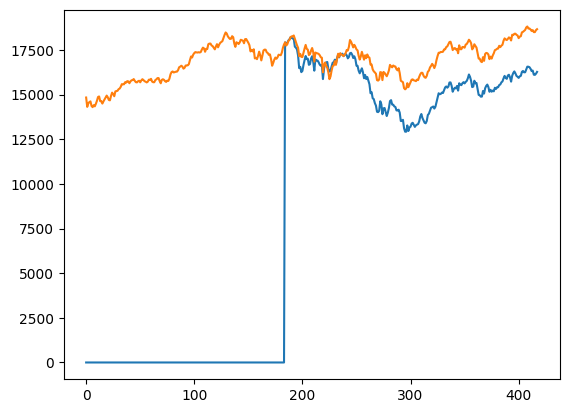

In [26]:
import matplotlib.pyplot as plt
plt.plot(equity_curve)
plt.plot(nifty_curve)
plt.show()